In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_rr.csv'

df_rr = pd.read_csv(url)
df_rr["DATE"] = pd.to_datetime(df_rr["DATE"],dayfirst=True)
for col in df_rr.columns[1:]:
    df_rr[col] = pd.to_numeric(df_rr[col],errors='coerce')

print(df_rr)

           DATE     WTI_HH   NCF_RCF   NCF_WTI     NCF_HH    NCF_NBP  \
0    2009-01-05   8.337907  0.920024  1.597408  13.319039   9.317755   
1    2009-01-06   7.960656  0.918079  1.673188  13.319672   9.094982   
2    2009-01-07   7.258065  0.911884  1.839766  13.353141   8.969184   
3    2009-01-08   6.993289  0.942262  1.898992  13.280201   9.340782   
4    2009-01-09   7.266071  0.920958  1.889899  13.732143   9.019865   
...         ...        ...       ...       ...        ...        ...   
2850 2020-08-25  16.996063  1.017382  1.152421  19.586614  15.375235   
2851 2020-08-26  17.146825  1.015322  1.150197  19.722222  15.008563   
2852 2020-08-27  17.015873  1.018405  1.161381  19.761905  14.134232   
2853 2020-08-28  17.463415  0.969349  1.177840  20.569106  13.098330   
2854 2020-08-31  18.526087  0.982042  1.219197  22.586957  13.412611   

         NCF_B     RCF_B    RCF_NBP     WTI_B  ...  NCF_RCF_r  NCF_WTI_r  \
0     1.564893  1.700927  10.127733  0.979645  ...   1.0573

In [2]:
## markov regime switching for price ratio returns ##

print(df_rr['WTI_HH_r'])
mod = sm.tsa.MarkovRegression(df_rr['WTI_HH'], k_regimes=2, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()


0       0.680735
1      -0.022210
2       3.475426
3      -2.106032
4       0.393234
          ...   
2850   -1.473531
2851   -0.117674
2852        -inf
2853   -0.078358
2854    0.125262
Name: WTI_HH_r, Length: 2855, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 WTI_HH   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood               -8386.317
Date:                Fri, 28 Jan 2022   AIC                          16784.635
Time:                        15:14:40   BIC                          16820.376
Sample:                             0   HQIC                         16797.523
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3696      0.105    183.618      0.000      19.163      19.576
sigma2        15.2464      0.504     30.271      0.000      14.259      16.234
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9521      0.409     75.751      0.000      30.151      31.753
sigma2        55.2382      3.415     16.175      0.000      48.545      61.931
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9966      0.001    766.896      0.000       0.994       0.999
p[1->0]        0.0134      0.005      2.743      0.006       0.004       0.023
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:} &     WTI\_HH      & \textbf{  No. Observations:  } &    2855     \\
\textbf{Model:}         & MarkovRegression & \textbf{  Log Likelihood     } & -8386.317   \\
\textbf{Date:}          & Fri, 28 Jan 2022 & \textbf{  AIC                } & 16784.635   \\
\textbf{Time:}          &     16:28:55     & \textbf{  BIC                } & 16820.376   \\
\textbf{Sample:}        &        0         & \textbf{  HQIC               } & 16797.523   \\
\textbf{}               &      - 2855      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const}  &      19.3696  &        0.105     &   183.618  &         0.000        &       19.163    &       19.576     \\
\textbf{sigma2} &      15.2464  &        0.504     &    30.271  &         0.000    

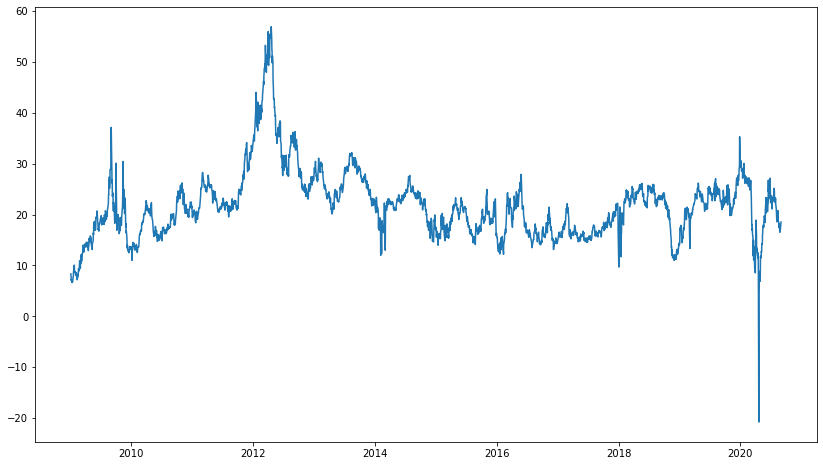

In [4]:
print(res_mod.summary().as_latex())
plt.figure(figsize=(14,8)) 
plt.plot(df_rr["DATE"],df_rr["WTI_HH"])